### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ecommerce_sales_data.csv')
df

,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [20]:


#1
print("#1 상위 5개 데이터")
print(df.head())

#2
print("\n#2 결측값 확인")
print(df.isnull().sum())

df = df.dropna()

#3
print("\n#3 데이터 타입 확인")
print(df.dtypes)

df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

print("\n#3 OrderDate 변환 후 데이터 타입 확인")
print(df.dtypes)

#1 상위 5개 데이터
   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  

#2 결측값 확인
OrderID         0
Product         0
Category        0
Quantity        0
Price           0
CustomerID      0
Birthdate       0
OrderDate       0
Country         0
DiscountRate    1
dtype: int64

#3 데이터 타입 확인
OrderID           int64
Product          object


C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\881863473.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

#1 'TotalRevenue' 열 생성 완료
   Quantity  Price  TotalRevenue
0         5  37000        185000
1         5  20000        100000
2         4   8000         32000
3         1   8000          8000
4         3  26000         78000

#2 월별 총 매출액
OrderDate
2023-10-31     392000
2023-11-30     995000
2023-12-31     920000
2024-01-31     905000
2024-02-29     565000
2024-03-31     538000
2024-04-30     288000
2024-05-31     930000
2024-06-30    1365000
2024-07-31     712000
2024-08-31     635000
2024-09-30     319000
2024-10-31     190000
Freq: ME, Name: TotalRevenue, dtype: int64


C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\3546691726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\3546691726.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df['TotalRevenue'].resample('M').sum()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\3546691726.py:18: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\3546691726.py:18: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

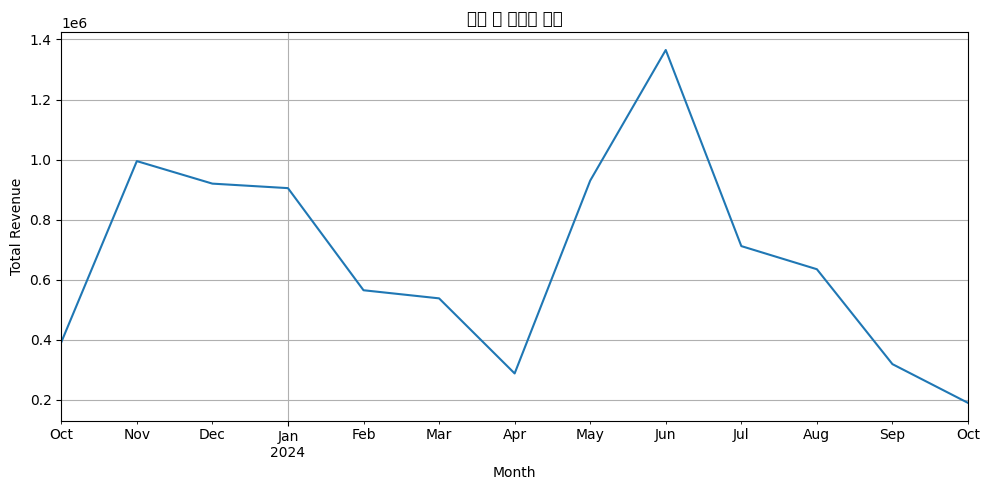


#3 카테고리별 매출 상위 3개
Category
Food           1801000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64

#4 국가별 총 매출 상위 5개 국가
Country
미국      2238000
독일      1808000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


In [21]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df = df.dropna(subset=['OrderDate', 'Quantity', 'Price'])

#1
df['TotalRevenue'] = df['Quantity'] * df['Price']
print("#1 'TotalRevenue' 열 생성 완료")
print(df[['Quantity', 'Price', 'TotalRevenue']].head())

#2
df.set_index('OrderDate', inplace=True)
monthly_revenue = df['TotalRevenue'].resample('M').sum()

print("\n#2 월별 총 매출액")
print(monthly_revenue)

monthly_revenue.plot(figsize=(10,5), title='월별 총 매출액 추이', ylabel='Total Revenue', xlabel='Month')
plt.grid(True)
plt.tight_layout()
plt.show()

#3
category_revenue = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)
print("\n#3 카테고리별 매출 상위 3개")
print(category_revenue)

#4
country_revenue = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print("\n#4 국가별 총 매출 상위 5개 국가")
print(country_revenue)

3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [22]:

df = pd.read_csv('./data/ecommerce_sales_data.csv')
df['TotalRevenue'] = df['Quantity'] * df['Price']

#1
customer_revenue = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print("#1 고객별 총 매출 상위 5명")
print(customer_revenue)

#2
customer_order_count = df['CustomerID'].value_counts().head(5)
print("\n#2 주문 횟수 상위 5명 고객")
print(customer_order_count)

#3
import numpy as np

np.random.seed(42)
df['Age'] = np.random.randint(18, 65, size=len(df))

def get_age_group(age):
    if age < 30:
        return '18-29'
    elif age < 40:
        return '30-39'
    elif age < 50:
        return '40-49'
    else:
        return '50-64'

df['AgeGroup'] = df['Age'].apply(get_age_group)

age_category_mode = df.groupby('AgeGroup')['Category'].agg(lambda x: x.mode()[0])
print("\n#3 연령대별 가장 많이 구매한 카테고리")
print(age_category_mode)

#1 고객별 총 매출 상위 5명
CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64

#2 주문 횟수 상위 5명 고객
CustomerID
1206    2
1278    2
1496    2
1007    2
1673    2
Name: count, dtype: int64

#3 연령대별 가장 많이 구매한 카테고리
AgeGroup
18-29        Food
30-39    Clothing
40-49       Books
50-64      Beauty
Name: Category, dtype: object


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [24]:
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df = df.dropna(subset=['OrderDate', 'Quantity', 'Price'])

#1
top5_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(5)
print("#1 가장 많이 판매된 상위 5개 상품")
print(top5_products)

#2
top_product_per_category = df.groupby(['Category', 'Product'])['Quantity'].sum().reset_index()
top_product_per_category = top_product_per_category.sort_values(['Category', 'Quantity'], ascending=[True, False])
top_product_by_category = top_product_per_category.groupby('Category').first()
print("\n#2 카테고리별 가장 많이 판매된 상품")
print(top_product_by_category)

#3
avg_quantity_top3 = df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)
print("\n#3 평균 구매 수량이 가장 높은 상위 3개 상품")
print(avg_quantity_top3)

#1 가장 많이 판매된 상위 5개 상품
Product
셔츠     25
립스틱    22
소설     21
커피     20
역사책    20
Name: Quantity, dtype: int64

#2 카테고리별 가장 많이 판매된 상품
            Product  Quantity
Category                     
Beauty          립스틱        22
Books            소설        21
Clothing         셔츠        25
Electronics     노트북        15
Food             커피        20
Sports         요가매트        12

#3 평균 구매 수량이 가장 높은 상위 3개 상품
Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:19: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:19: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:19: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:19: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:19: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:19: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing fro

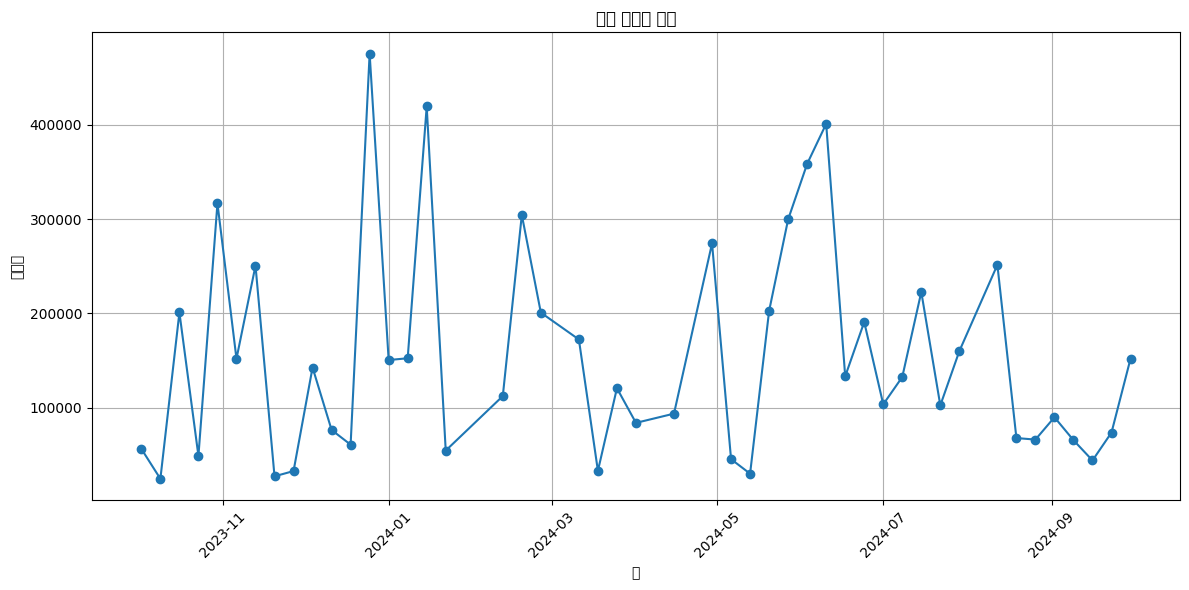

C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:33: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:33: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:33: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:33: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:33: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:33: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing f

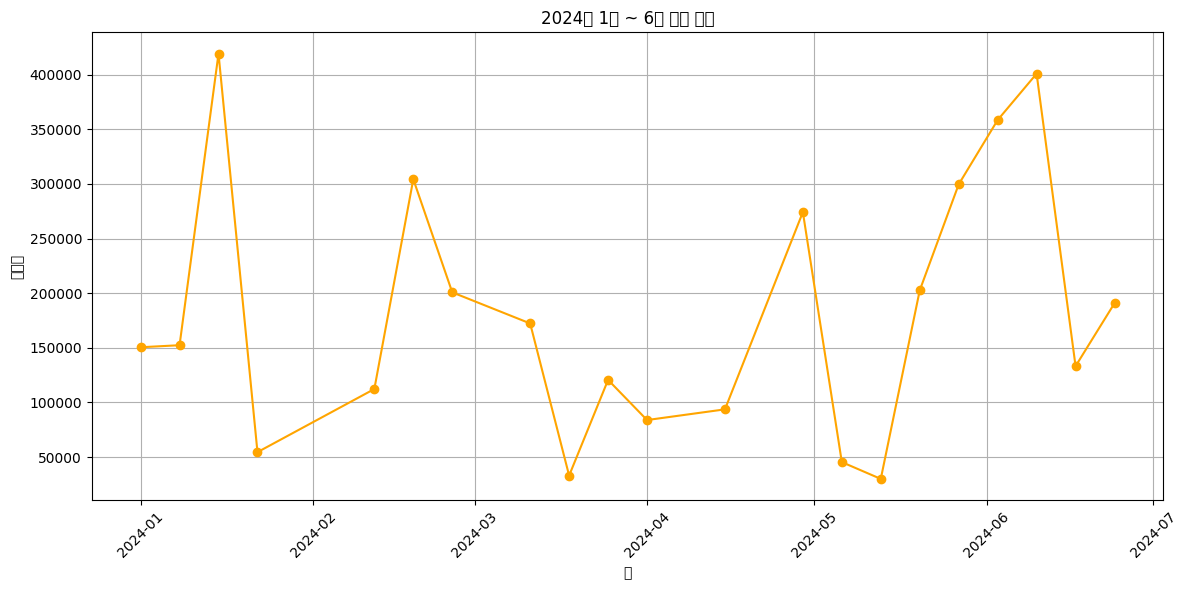

C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Hour'] = df_us['OrderDate'].dt.hour
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:49: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:49: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:49: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\1899860420.py:49: UserWarnin

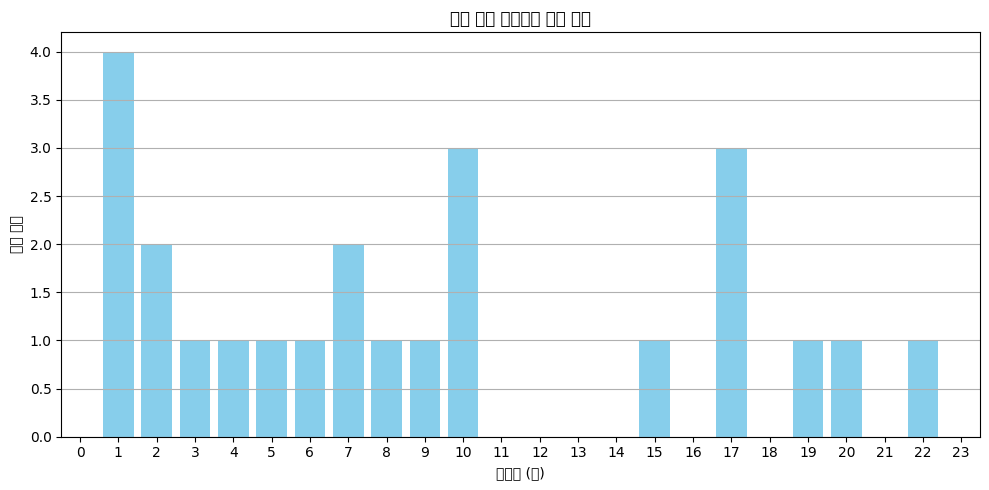

In [28]:
# datetime 변환
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

#1 주문 날짜별 주별 매출액 계산 및 시각화
df['Week'] = df['OrderDate'].dt.to_period('W').apply(lambda r: r.start_time)  # 주 시작일로 변환
df['Sales'] = df['Quantity'] * df['Price'] * (1 - df['DiscountRate'])

weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(weekly_sales['Week'], weekly_sales['Sales'], marker='o')
plt.title('주별 매출액 추이')
plt.xlabel('주')
plt.ylabel('매출액')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2 2024년 1월 ~ 2024년 6월 기간 매출 추이 분석 및 시각화
mask = (df['OrderDate'] >= '2024-01-01') & (df['OrderDate'] <= '2024-06-30')
period_sales = df.loc[mask].groupby('Week')['Sales'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(period_sales['Week'], period_sales['Sales'], marker='o', color='orange')
plt.title('2024년 1월 ~ 6월 매출 추이')
plt.xlabel('주')
plt.ylabel('매출액')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#3 특정 국가별 가장 많이 주문한 시간대 분석 및 시각화
# 예시로 '미국' 선택
df_us = df[df['Country'] == '미국']
df_us['Hour'] = df_us['OrderDate'].dt.hour
hourly_orders_us = df_us.groupby('Hour').size().reset_index(name='OrderCount')

plt.figure(figsize=(10,5))
plt.bar(hourly_orders_us['Hour'], hourly_orders_us['OrderCount'], color='skyblue')
plt.title('미국 주문 시간대별 주문 건수')
plt.xlabel('시간대 (시)')
plt.ylabel('주문 건수')
plt.xticks(range(0,24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

재구매 고객 비율: 8.11%
      Category  avg_discount  total_sales
0       Beauty      0.186522    1209380.0
5       Sports      0.179444     866680.0
3  Electronics      0.175789    1453730.0
4         Food      0.174091    1473980.0
1        Books      0.170000    1166780.0
2     Clothing      0.154000    1059820.0


C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\207433974.py:30: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\207433974.py:30: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\207433974.py:30: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\207433974.py:30: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\207433974.py:30: UserWarning: Glyph 54624 (\N{HANGUL SYLLABLE HAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jenny\AppData\Local\Temp\ipykernel_25092\207433974.py:30: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) D

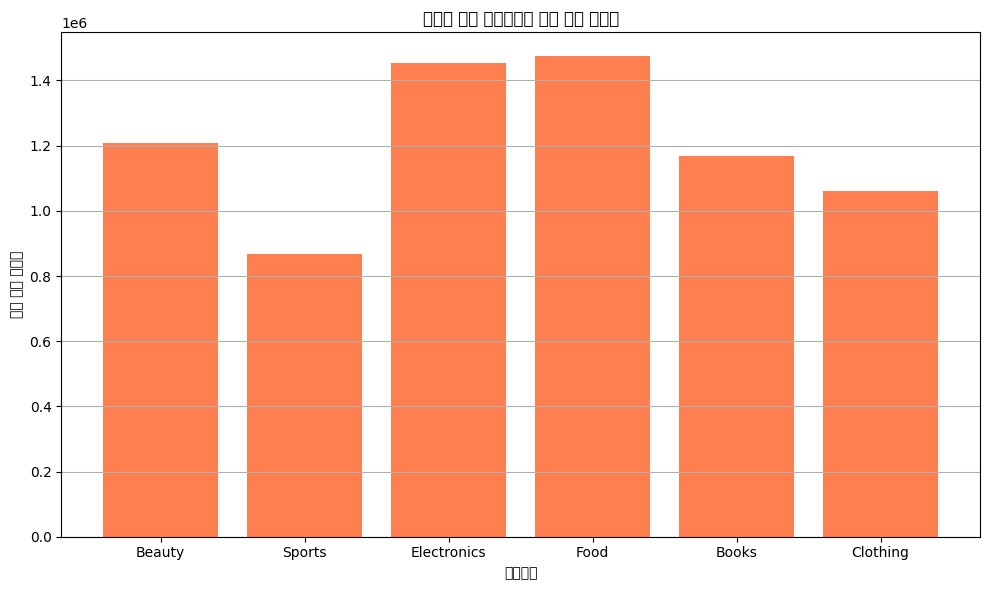

In [27]:


#1 고객 재구매율 분석
# 한 고객이 2회 이상 주문한 고객 비율
customer_order_counts = df.groupby('CustomerID')['OrderID'].nunique()
repeat_customers = customer_order_counts[customer_order_counts > 1].count()
total_customers = customer_order_counts.count()
repurchase_rate = repeat_customers / total_customers

print(f"재구매 고객 비율: {repurchase_rate:.2%}")

#2 상품 카테고리별 할인율이 높은 카테고리 매출액 분석
# 할인 적용 매출액 컬럼은 이미 Sales로 계산됨
# 카테고리별 평균 할인율과 할인 적용 매출액 계산
category_discount_sales = df.groupby('Category').agg(
    avg_discount = ('DiscountRate', 'mean'),
    total_sales = ('Sales', 'sum')
).reset_index()

# 할인율이 높은 카테고리 순으로 정렬
category_discount_sales_sorted = category_discount_sales.sort_values(by='avg_discount', ascending=False)

print(category_discount_sales_sorted)

# 시각화 - 할인율이 높은 카테고리별 매출액
plt.figure(figsize=(10,6))
plt.bar(category_discount_sales_sorted['Category'], category_discount_sales_sorted['total_sales'], color='coral')
plt.title('할인율 높은 카테고리별 할인 적용 매출액')
plt.xlabel('카테고리')
plt.ylabel('할인 적용 매출액')
plt.grid(axis='y')
plt.tight_layout()
plt.show()